In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Steup data frame and dates for daily precipitation data by year
year = 2016
df = pd.DataFrame(columns=['station'])
dts = pd.date_range(str(year) + "-01-01", str(year) + "-12-31", freq="D")

In [3]:
# Retrieve precipitation data for year and merge into dataframe
for dt in dts:
    d = str(dt.date())
    dt_df = pd.read_csv(f'outputs/prcp/{year}/csv/{d}.csv')
    df = df.merge(dt_df, on='station', how='outer')

In [4]:
# Add Station Information to Dataframe
stn_df = pd.read_csv(f'outputs/prcp/{year}/CA_{year}_coords.csv')
df = df.merge(stn_df, on='station')
df

,station,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,lat,lon,elev,name
0,US1CAAL0001,0.0,0.0,0.0,1.3,18.3,23.9,15.2,0.0,2.3,...,0.0,0.0,0.0,0.0,0.0,0.0,37.8123,-122.2160,113.4,CA PIEDMONT 1.0 SE
1,US1CAAL0003,0.0,0.0,0.0,1.3,23.1,14.5,3.8,0.5,1.3,...,0.0,0.0,0.0,0.0,0.0,0.0,37.7169,-122.0585,163.4,CA CASTRO VALLEY 0.4 NNE
2,US1CAAL0004,0.0,0.0,0.0,0.0,14.7,7.9,6.6,0.0,1.5,...,0.0,0.0,0.0,NaN,NaN,NaN,37.6483,-121.8745,107.0,CA PLEASANTON 1.8 SSE
3,US1CAAL0006,NaN,NaN,NaN,3.8,15.5,27.4,15.5,0.3,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,37.8319,-122.2503,58.2,CA OAKLAND 4.4 NNW
4,US1CAAL0007,0.0,0.0,0.0,0.5,15.0,16.3,7.6,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,37.5150,-121.9523,9.1,CA FREMONT 2.6 ESE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,USW00093241,0.0,0.0,0.0,7.9,NaN,NaN,NaN,0.8,4.1,...,0.0,0.0,0.0,0.0,0.0,0.0,38.3775,-121.9586,31.7,CA VACAVILLE/NUT TREE AP ASOS
1126,USW00093242,0.0,0.0,0.0,0.5,NaN,NaN,NaN,0.0,0.3,...,0.0,0.0,0.0,0.0,0.0,2.5,36.9850,-120.1106,76.5,CA MADERA MUNI AP
1127,USW00093243,0.0,0.0,0.0,1.9,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,37.2381,-120.8825,23.8,CA MERCED 23 WSW CRN
1128,USW00093245,0.0,0.0,9.2,11.8,NaN,NaN,NaN,0.7,5.1,...,0.0,0.0,0.0,0.0,0.0,0.0,38.3208,-123.0747,19.2,CA BODEGA 6 WSW CRN


In [5]:
date_columns = df.columns[1:366]  # Adjust this if necessary

# Convert the daily columns to numeric (if they are not already)
df[date_columns] = df[date_columns].apply(pd.to_numeric, errors='coerce')

# Initialize a dictionary to hold the monthly data
monthly_data = {}

# Iterate over each station
for station in df.index:
    monthly_totals = []
    for month in range(1, 13):
        # Generate the date range for the current month
        days_in_month = pd.date_range(f'2016-{month:02d}-01', periods=31)  # Adjust periods for different months if necessary
        days_in_month = days_in_month[days_in_month.month == month]  # Ensure only the current month is included
        
        # Find the corresponding columns in the DataFrame
        daily_columns = [col for col in df.columns if col in days_in_month.strftime('%Y-%m-%d')]
        
        # Sum the daily values for the current month
        monthly_total = df.loc[station, daily_columns].sum()
        monthly_totals.append(monthly_total)
    
    monthly_data[station] = monthly_totals

# Create a new DataFrame with the monthly totals
monthly_df = pd.DataFrame(monthly_data, index=[f'2016-{month:02d}' for month in range(1, 13)]).T

# Add the metadata columns back to the new DataFrame
metadata_columns = ['lat', 'lon', 'elev', 'name']  # Adjust this list based on your actual DataFrame
monthly_df = pd.concat([monthly_df, df[metadata_columns]], axis=1)

# Remove rows with NaN values
monthly_df = monthly_df.dropna()

# Sum each month
monthly_sums2016 = monthly_df.sum(axis=0)

# Display the resulting DataFrame and the monthly sums
print(monthly_df)
print(monthly_sums2016)

      2016-01  2016-02  2016-03  2016-04  2016-05  2016-06  2016-07  2016-08  \
0       220.2     14.7    211.6     39.5      8.4      0.0      0.0      0.0   
1       146.9     28.8    175.0     50.8      6.9      0.0      0.3      0.0   
2       122.1     26.7    157.5     21.7      7.7      0.0      0.0      0.0   
3       213.6     15.2    194.0     35.4      0.0      0.0      0.0      0.0   
4        84.8     24.4    103.6     33.5      5.8      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1125    148.3      9.5    157.4     21.5     11.3      0.0      0.0      0.0   
1126     69.6      0.3     59.3     40.3      0.0      0.0      0.0      0.0   
1127     79.8      4.7     58.3     43.1     15.3      0.0      0.0      0.0   
1128    141.7     23.6    173.4     30.3      4.0      6.4      0.5      1.6   
1129     50.4     11.0     36.1     33.7     29.7     14.2      1.3      0.0   

      2016-09  2016-10  2016-11  2016-1

In [6]:
# Select only the monthly columns (assuming the last few columns are metadata and not needed here)
monthly_sums2016 = monthly_sums2016.iloc[:12]

# Create a dictionary to map month numbers to abbreviations
month_mapping = {
    '2016-01': 'Jan', '2016-02': 'Feb', '2016-03': 'Mar', '2016-04': 'Apr',
    '2016-05': 'May', '2016-06': 'Jun', '2016-07': 'Jul', '2016-08': 'Aug',
    '2016-09': 'Sep', '2016-10': 'Oct', '2016-11': 'Nov', '2016-12': 'Dec'
}

# Rename the Series index using the month mapping
monthly_sums2016.index = monthly_sums2016.index.map(month_mapping)

# Convert millimeters to inches and round to 2 decimal places
monthly_sums2016 = (monthly_sums2016 * 0.0393701).round(2)

monthly_sums2016

Jan    7068.110116
Feb    1225.299874
Mar    5935.448087
Apr    1431.685812
May     613.862536
Jun     182.358366
Jul      39.059076
Aug      23.090564
Sep      88.972489
Oct    4420.309474
Nov    2793.233792
Dec    5342.231231
dtype: object

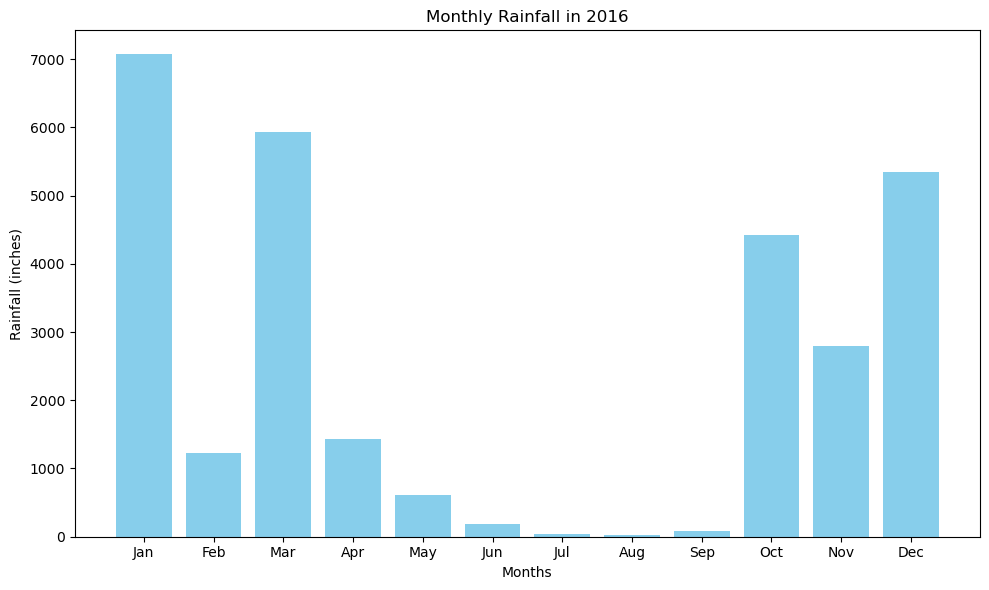

In [8]:
# Extract months and rainfall values from monthly_sums2016
months = list(monthly_sums2016.index)
rainfall_values = list(monthly_sums2016.values)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(months, rainfall_values, color='skyblue')

# Add labels and title
plt.xlabel('Months')
plt.ylabel('Rainfall (inches)')
plt.title('Monthly Rainfall in 2016')

# Adjust layout for better appearance
plt.tight_layout()

# Define output path and create directory if it doesn't exist
output_path = Path("outputs")
os.makedirs(output_path, exist_ok=True)

# Save the plot as an image file in the "output" folder
output_file = output_path / "Monthly_Rainfall_2016.png"
plt.savefig(output_file)

# Show the plot
plt.show()